In [3]:
import matplotlib.pyplot as plt
import numpy as np
from proj1_helpers import *
from implement import *


DATA_FOLDER = 'data'
DATA_TRAIN_PATH = '../data/train.csv'


y, tX, ids = load_csv_data(DATA_TRAIN_PATH)



In [4]:

ind_DER_mass_MMC = 0
ind_DER_mass_transverse_met_lep = 1
ind_DER_mass_vis = 2
ind_DER_pt_h   = 3
ind_DER_deltaeta_jet_jet = 4
ind_DER_mass_jet_jet = 5
ind_DER_prodeta_jet_jet = 6
ind_DER_deltar_tau_lep = 7
ind_DER_pt_tot   = 8
ind_DER_sum_pt   = 9
ind_DER_pt_ratio_lep_tau   = 10
ind_DER_met_phi_centrality   = 11
ind_DER_lep_eta_centrality   = 12
ind_PRI_tau_pt   = 13
ind_PRI_tau_eta   = 14
ind_PRI_tau_phi   = 15
ind_PRI_lep_pt   = 16
ind_PRI_lep_eta = 17
ind_PRI_lep_phi = 18
ind_PRI_met   = 19
ind_PRI_met_phi   = 20
ind_PRI_met_sumet   = 21
ind_PRI_jet_num   = 22
ind_PRI_jet_leading_pt   = 23
ind_PRI_jet_leading_eta   = 24
ind_PRI_jet_leading_phi   = 25
ind_PRI_jet_subleading_pt   = 26
ind_PRI_jet_subleading_eta   = 27
ind_PRI_jet_subleading_phi   = 28
ind_PRI_jet_all_pt   = 29



Step 1 : Correct the values for jet_num = 2 // All the values in DER_mass_MMC = -999.000
We correct them by extracting the correct values in this column (which is DER_mass_MMC)
And train a model to predict the value of this column using the values from the other parameters

Task 1 from this step : Extract and store in proper way, in order to have a 
- 'y' vector containing the right values of DER_mass_MMC
- 'x' matrix containing the others columns from the right values of DER_mass_MMC (associated to y)
- 'wrongX_topredict' containing the parameters from the wrong values of DER_mass_MMC 

We will then train the model using y and x, and then compute this trained model with wrongX_topredict in order to have some approx. correct values and replace all the -999.000

In [26]:
# Extract indices from dataset only jet_num = 2 // ravel() is used to transform into a single vector the indices
ind_jet2 = np.argwhere((tX[:,ind_PRI_jet_num] == 2)).ravel()

# Create new dataset extracting only jet_num = 2
datajet2 = tX[ind_jet2]
colToDelete = [ind_PRI_jet_num]    
datajet2 = np.delete(datajet2, colToDelete , axis=1)

print(datajet2.min(axis=0))
# Now we want to extract and correct -999.000 values from DER_mass_MMC

print("Length of Jet_num = 2 : " +str(datajet2[:,ind_DER_mass_MMC].shape))

# Extract indices where the wrong value of DER_mass_MMC == -999.000 // We want to correct/predict these values
ind_wrongjet2 = np.argwhere(datajet2[:,ind_DER_mass_MMC] == -999.000).ravel()
print(ind_wrongjet2)

# Extract indices where the values of DER_mass_MMC are correct // We will train from these datas
ind_rightjet2 = np.argwhere(datajet2[:,ind_DER_mass_MMC] != -999.000).ravel()
print(ind_rightjet2)

# Extract data DER_mass_MMC only wrong values
wrongjet2 = datajet2[ind_wrongjet2]
print(wrongjet2.shape)

#Create the data that will compute the predicted y (DER_mass_MMC)
tx_wrongjet2 = np.delete(wrongjet2, ind_DER_mass_MMC, axis=1)
print(tx_wrongjet2.shape)


# Extract data DER_mass_MMC only correct values
rightjet2 = datajet2[ind_rightjet2]
print(rightjet2.shape)
#Now we'll extract the DER_mass_MMC column and turn it into a 'y' vector sample,
# The others columns will be the 'X' data samples
y_rightjet2 = rightjet2[:, ind_DER_mass_MMC]
print(y_rightjet2.shape)
tx_rightjet2 = np.delete(rightjet2, ind_DER_mass_MMC, axis=1)
print(tx_rightjet2.shape)

[-9.99000e+02  0.00000e+00  7.33000e+00  1.20000e-01  0.00000e+00
  1.36020e+01 -1.80660e+01  2.28000e-01  4.00000e-03  1.10601e+02
  4.70000e-02 -1.41400e+00  0.00000e+00  2.00000e+01 -2.49500e+00
 -3.14100e+00  2.60010e+01 -2.48700e+00 -3.14200e+00  2.00000e-01
 -3.14200e+00  3.43230e+01  3.01960e+01 -4.49700e+00 -3.14200e+00
  3.00000e+01 -4.50000e+00 -3.14200e+00  6.02230e+01]
Length of Jet_num = 2 : (50379,)
[   11    36    72 ... 50277 50363 50367]
[    0     1     2 ... 50376 50377 50378]
(2952, 29)
(2952, 28)
(47427, 29)
(47427,)
(47427, 28)


Now that we have the data we will train the model

In [27]:
from implement import *
from cross_validation import *
import matplotlib.pyplot as plt

In [28]:
#best_degree_selection(y_rightjet3,tx_rightjet3, np.arange(1,11), 5, np.logspace(-4, 0, 30), seed = 2)

# Best degree : 2 / Best lambda : 0.00013738237958832623

136.3934582595315
[138.47  148.754 141.481 ... 119.934 126.151 217.02 ]
[145.08905952 164.89384816 145.16929834 ... 114.18685677 124.75259286
 137.52097018]


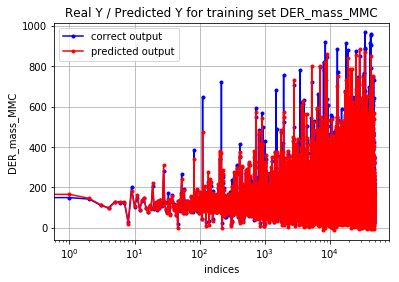

In [29]:
tx_rightjet2_poly = build_poly(tx_rightjet2, 2)


loss, w_jet2 = ridge_regression(y_rightjet2, tx_rightjet2_poly, 0.00013738237958832623)
print(loss)


y_pred = tx_rightjet2_poly.dot(w_jet2)
print(y_rightjet2)
print(y_pred)


plt.semilogx(np.arange(y_pred.shape[0]), y_rightjet2, marker=".", color='b', label='correct output')
plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='r', label='predicted output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Real Y / Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

#cross_validation_demo(y_rightjet3,tx_rightjet3, 2, 5)

The model is trained so we will now compute/predict the values for the wrong ones.

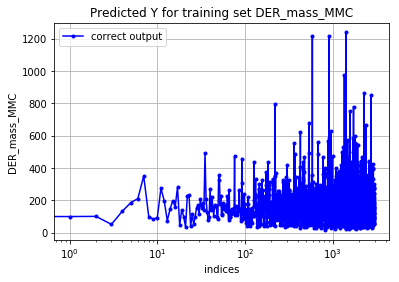

In [30]:
tx_wrongjet2_poly = build_poly(tx_wrongjet2, 2)

y_pred = tx_wrongjet2_poly.dot(w_jet2)


plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='b', label='correct output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

We will now correct the initial dataset.

In [31]:
wrongjet2[:, ind_DER_mass_MMC] = y_pred

datajet2[ind_wrongjet2] = wrongjet2

datajet2.min(axis=0)

array([ 9.87800e+00,  0.00000e+00,  7.33000e+00,  1.20000e-01,
        0.00000e+00,  1.36020e+01, -1.80660e+01,  2.28000e-01,
        4.00000e-03,  1.10601e+02,  4.70000e-02, -1.41400e+00,
        0.00000e+00,  2.00000e+01, -2.49500e+00, -3.14100e+00,
        2.60010e+01, -2.48700e+00, -3.14200e+00,  2.00000e-01,
       -3.14200e+00,  3.43230e+01,  3.01960e+01, -4.49700e+00,
       -3.14200e+00,  3.00000e+01, -4.50000e+00, -3.14200e+00,
        6.02230e+01])

(50379, 29)
(250000,)
(50379,)


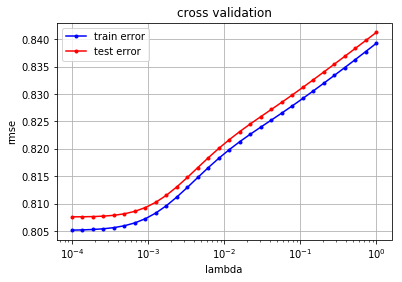

In [32]:
print(datajet2.shape)
print(y.shape)

y_jet2 = y[ind_jet2]
print(y_jet2.shape)

cross_validation_demo(y_jet2,datajet2, 2, 5)

In [34]:
datajet2_poly = build_poly(datajet2, 2)


loss, w_pred_jet2 = ridge_regression(y_jet2, datajet2_poly, 0.00013738237958832623)
print(loss)

0.32437118095584916


In [35]:
y_pred = predict_labels(w_pred_jet2, datajet2_poly)
y_pred

result = np.sum(y_pred == y_jet2)

print("Final result : " + str(result/y_jet2.shape[0]))

Final result : 0.7727823100895215
